<a href="https://colab.research.google.com/github/maxou-uoxam/training_data_deep_learning/blob/main/SupervisedLearning_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A standard feature vector dataset
One considers here the Iris dataset. It contains a set of iris sample measures associated to the species.
Provided features are the following:

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
> *   Iris Setosa
> *   Iris Versicolour
> *   Iris Virginica

The aim is to find a way to separate the different iris classes.

# Load the data

**TODO** print the data to look at its shapes, values, etc

In [17]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

#TODO print/plot the data


## Have a look, plot the 3D data in 3D to see how it is organized

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


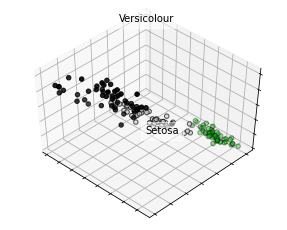

In [18]:
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 2], X[:, 3], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Plot a 2D projection to simplify and show the effect of dimension reduction (3D->2D)

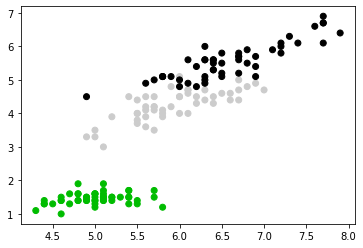

In [19]:
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.nipy_spectral)

## TODO : manually find a good 3D or 2D projection that would be appropriate to separate the 3 classes.
Can you find a 2D or 3D projection that has axes aligned with the data ?

In [20]:
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## First create a train and validation data split
get 80% of the data samples for each class and put this into a 'train' data split, put the remaining samples in a 'validation' data split.

One will use the train split as reference data, predict on the validation samples and check the prediction quality.

In [22]:
def get_train_test_class_ids(labels, classID):
  ''' a helper that detects all the samples associated with a specific classID
    and returns 2 arrays, one for training, the remaining for validation/test)
  '''
  class_ids=np.where(labels==classID)[0]#get the table INDEX of the labels that belon to class 0 
  num_class=len(class_ids)
  train_val_id_limit=int(0.8*num_class)
  class_ids_train=class_ids[:train_val_id_limit]
  class_ids_val=class_ids[train_val_id_limit:]
  return class_ids_train, class_ids_val

#TODO call this method to create two datasets, each one being composed of samples from the 3 classes
# Hint, you may get train/test splits for each class and then concatenate them to build up the final datasets 
class0_ids_train, class0_ids_val = get_train_test_class_ids(labels=y, classID=0)
class1_ids_train, class1_ids_val = get_train_test_class_ids(labels=y, classID=1)
class2_ids_train, class2_ids_val = get_train_test_class_ids(labels=y, classID=2)
print('class0_ids_train',class0_ids_train)
print('class0_ids_test',class0_ids_val)
#create the train and validation datasets, each being composed of X data and associted y labels
train_ids=np.concatenate([class0_ids_train, class1_ids_train, class2_ids_train])
y_train=y[train_ids]
X_train=X[train_ids]
val_ids=np.concatenate([class0_ids_val, class1_ids_val, class2_ids_val])
y_val=y[val_ids]
X_val=X[val_ids]
print('y_train', y_train)
print('y_val', y_val)

class0_ids_train [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139]
class0_ids_test [140 141 142 143 144 145 146 147 148 149]
y_train [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
y_val [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


## Apply a KNN classifier

Complete the following code to predict the test datasets class samples relying on a KNN method and the train dataset


In [25]:
from sklearn.neighbors import KNeighborsClassifier

#TODO1 complete the code to predic on your test dataset
k=1
my3NN=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
predicted_y_test=my3NN.predict(X_val)

#TODO2 print the results and compare with the ground truth



## TODO define a confusion matrix to compute performance measures
A confusion matrix counts the number of good prediction for each class as well as wrong predictions and shows which class has been confused with another.
More info here https://en.wikipedia.org/wiki/Confusion_matrix.

Implement the confusion matrix, maybe have a look at the sklearn library to get the function on the shelf.


In [53]:
import sklearn
def confusionMatrix(y_true, y_pred):
  ''' define here your confusion matrix.
  Args: 
     y_true, the ground truth, expected class
     y_pred, the predicted class mabels to be compared with the ground truth
  Returns: the confusion matrix
  '''
  conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
  return conf_matrix

def accuracy(conf_mat):
  '''
  Compute a standard performance measure, the Accuracy
  Accuracy= the number of good predictions out of the total number of predictions
  '''
  #TODO2
  acc = np.diag(conf_mat).sum() / conf_mat.sum()
  return acc

#apply on the obtained predictions
conf_mat = confusionMatrix(y_val, predicted_y_test)
print(conf_mat)
print('accuracy=',accuracy(conf_mat))



[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
accuracy= 1.0


## Search for the best number of neighbors (k) to maximise performance

k 1 => Accuracy=1.0
k 2 => Accuracy=1.0
k 3 => Accuracy=1.0
k 4 => Accuracy=1.0
k 5 => Accuracy=1.0
k 6 => Accuracy=1.0
k 7 => Accuracy=1.0
k 8 => Accuracy=1.0
k 9 => Accuracy=1.0
k 10 => Accuracy=1.0
k 11 => Accuracy=1.0
k 12 => Accuracy=1.0
k 13 => Accuracy=1.0
k 14 => Accuracy=1.0
k 15 => Accuracy=1.0
k 16 => Accuracy=1.0
k 17 => Accuracy=1.0
k 18 => Accuracy=1.0
k 19 => Accuracy=1.0
k 20 => Accuracy=1.0
k 21 => Accuracy=1.0
k 22 => Accuracy=1.0
k 23 => Accuracy=1.0
k 24 => Accuracy=1.0
k 25 => Accuracy=1.0
k 26 => Accuracy=1.0
k 27 => Accuracy=1.0
k 28 => Accuracy=1.0
k 29 => Accuracy=1.0
k 30 => Accuracy=1.0
k 31 => Accuracy=1.0
k 32 => Accuracy=1.0
k 33 => Accuracy=1.0
k 34 => Accuracy=1.0
k 35 => Accuracy=1.0
k 36 => Accuracy=1.0
k 37 => Accuracy=1.0
k 38 => Accuracy=1.0
k 39 => Accuracy=1.0
k 40 => Accuracy=1.0
k 41 => Accuracy=1.0
k 42 => Accuracy=1.0
k 43 => Accuracy=1.0
k 44 => Accuracy=1.0
k 45 => Accuracy=1.0
k 46 => Accuracy=1.0
k 47 => Accuracy=0.9666666666666667
k 48 =>

Text(0.5, 1.0, 'Accuracy =f(k)')

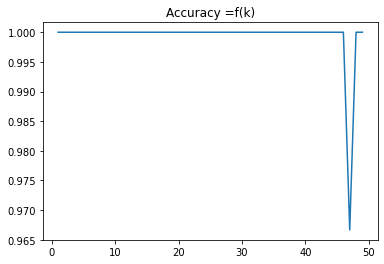

In [54]:
from sklearn.neighbors import KNeighborsClassifier

def evalKNN(X_train, y_train, X_val, y_val, k):
  my3NN=KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  predicted_y_val=my3NN.predict(X_val)
  confusion_matrix=confusionMatrix(y_val, predicted_y_val) #TODO
  accur=accuracy(confusion_matrix) #TODO
  return confusion_matrix, accur 

ks=[]
accs=[]
for k in range(1,50):
  conf_mat, accur = evalKNN(X_train, y_train, X_val, y_val, k)
  print('k {kval} => Accuracy={acc}'.format(kval=k, acc=accur))
  ks.append(k)
  accs.append(accur)
plt.plot(ks, accs)
plt.title('Accuracy =f(k)')

# Images dataset
One considers here an image dataset composed of 3 classes. The aim is to find away to visualize the data in order to separate the classes.

In [56]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

#get the dataset
!git clone  https://github.com/albenoit/transfer-learning/ 
#create a tensorflow data generator to retreive the TRAINING images
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator=train_datagen.flow_from_directory('./transfer-learning/traindata_2/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=90,
                                                 class_mode='categorical',
                                                 shuffle=False)
#create a tensorflow data generator to retreive the TRAINING images
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
test_generator=test_datagen.flow_from_directory('./transfer-learning/animals/val/',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=15,
                                                 class_mode='categorical',
                                                 shuffle=False)


fatal: destination path 'transfer-learning' already exists and is not an empty directory.
Found 90 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


## Load the dataset in a numpy array and plot some examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


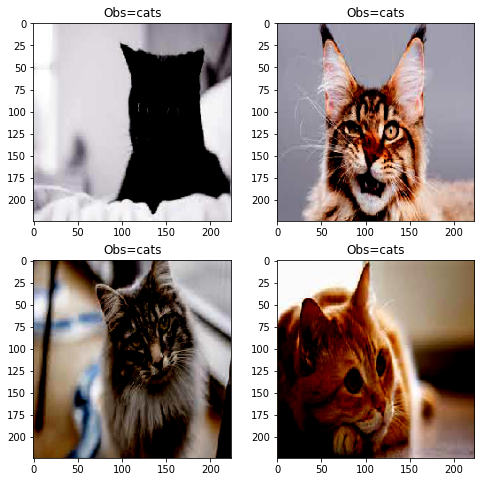

In [42]:
# Get validation images and compute their predictions
# plot images together with the predicted class in the title as well as its posterior probability

images_train , labels_train = train_generator.next()
images_test , labels_test = test_generator.next()
categories =sorted(os.listdir('transfer-learning/animals/val/'))

# plot three images and print their class
import  matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
for j in range(4):
  plt.subplot(2,2,j+1)
  plt.imshow(images_train[j])
  plt.title('Obs={id}'.format(id=categories[np.argmax(labels_train[j])]))

# TODO
Create KNN classifier and use the train data samples as for the previous dataset to predict class samples on the test data.

Evaluate performances (cofusion matrix and accuracy)

## Questions : 
*  Is KNN applied on the raw images running fine ?
*  Is KNN applied on the image transformations applied by a pretrained deep neural network (here the MobileNet model) running fine ?


# Preprocess the data with a neural network
The aime here is to extract a high level description of the data before applying traditionnal dimension reduction

In [45]:
import pandas as pd
import numpy as np
import os
import keras
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.models import Model


In [46]:
# create the model: consider a pretrained object recognizer, cuts its head in order to just keep the last-1 layer as a feature provider
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
model=Model(inputs=base_model.input,outputs=x)

#DEMO : you can apply neural network on some images
X__nn=model.predict(images_train)
print('Obtained deep features=', X__nn.shape)

17235968/17225924 [==============================] - 0s 0us/step
Obtained deep features= (197, 1024)


# Apply KNN from the output of the Neural network :

Does the neural net better separate the data such that KNN runs better ?

In [59]:
k=4
my3NN=KNeighborsClassifier(n_neighbors=k).fit(images_train, X__nn)
predicted_y_test=my3NN.predict(X__nn)

ValueError: ignored

# Going further

* find the best k value that maximizes prediction performances
* identify the impact of the training data class balance:
    
    * Compare results when KNN training samples come from folder `transfer-learning/traindata_1/` and `transfer-learning/traindata_2/`.
    
    * How and why does it impact on performance ?